# Preprocessing
This notebook generates the dataset for training.

In [35]:
from glob import glob
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

SIZE = 64
datasets = ["kaggle", "hromada"]
DIR = os.path.abspath("")
DATA_DIR = os.path.join(DIR, "..", "..", "data")

First, creat the dataset class for the different sets

In [36]:
class DataSet:
    data = []
    labels = []
    weights = []
    positives = []
    negatives = []
    def __init__(self, set):
        self.positives = glob(os.path.join(DATA_DIR, "positives",  set, "*"))
        self.negatives = glob(os.path.join(DATA_DIR, "negatives",  set, "*"))
    
    def process(self, size):
        self.data = []
        self.labels = []
        self.weights = []
        img_paths = []
        img_paths.extend(self.positives)
        img_paths.extend(self.negatives)

        for img_path in img_paths:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = imutils.resize(image, width = size, height = size)
            image = img_to_array(image)
            self.data.append(image)
            self.weights.append(1)
            if(img_path in self.positives):
                label = 1
            else:
                label = 0
            self.labels.append(label)


        self.data = np.array(self.data, dtype="float") / 255.0
        self.labels = np.array(self.labels)
        self.weights = np.array(self.weights)
    def count(self):
        return len(self.negatives) + len(self.positives)


3005


Now start preprocess the datasets...

In [37]:
data = np.empty((0, SIZE, SIZE, 1))
labels = np.empty((0,1))
weights = np.empty((0,1))
for dataset in datasets:
    ds = DataSet(dataset)
    ds.process(SIZE)
    data = np.append(data, ds.data, axis = 0)
    labels = np.append(labels, ds.labels)
    weights = np.append(weights, ds.weights)

print("{} images loaded.".format(data.shape[0]))

Next preprocess the images (change to monochrome, resize and convert to array). Also create the right labels. After this step, the data is almost ready for processing.

Now we check if the data is loaded correctly.

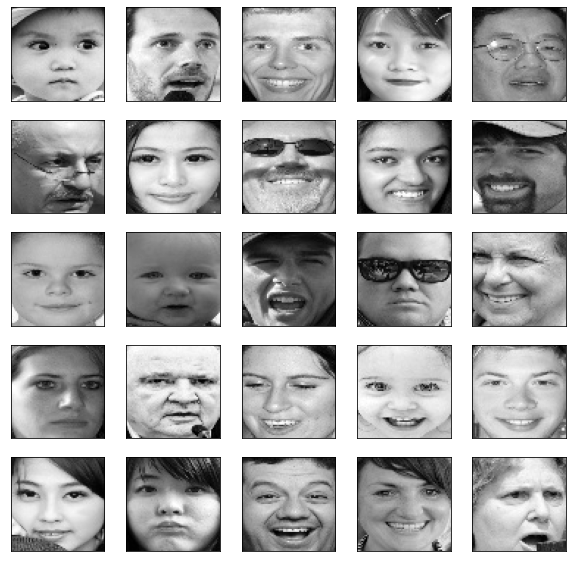

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.choice(len(data))
    plt.imshow(data[idx], cmap = "gray")
    if(labels[idx] == 1):
        text = "Smiling"
    else:
        text = "Not Smiling"
    plt.xlabel(text, color = "white")
plt.show()

Now that this looks good, we partition the data into train and test sets and export them for training.

In [39]:
(train_images, test_images, train_labels, test_labels, train_weights, test_weights) = \
    train_test_split(data,labels, weights, test_size= 0.20, stratify=labels)
output_path = os.path.join(DATA_DIR,"processed", str(SIZE) + "_" + "_".join(datasets) + ".npz")
np.savez_compressed(output_path,
    train_images = train_images,
    test_images = test_images,
    train_labels = train_labels,
    test_labels = test_labels,
    train_weights = train_weights,
    test_weights = test_weights)
print("Saved data in {}".format(output_path))

Saved data in /home/timo/Projects/photobox/bin/smile_evaluation_ml/../../data/processed/64_kaggle.npz
